In [6]:
library(tidyverse)
library(repr)
library(rvest)
library(stringr)

In [22]:
temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip", temp)
pulsar_file <- unz(temp, "HTRU_2.csv")
pulsar <- read_csv(pulsar_file, col_names = FALSE)
colnames(pulsar) = c("mean_integrated", "sd_integrated", "kurtosis_integrated", "skew_integrated", "mean_DMSNR", "sd_DMSNR", "kurtosis_DMSNR", "skew_DMSNR", "target_class")
pulsar = mutate(pulsar, target_class = as.factor(target_class))
head(pulsar)


Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double()
)


mean_integrated,sd_integrated,kurtosis_integrated,skew_integrated,mean_DMSNR,sd_DMSNR,kurtosis_DMSNR,skew_DMSNR,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


Using the training set, we summarized the data into the table below. We grouped by the target_class column, then used summarize to count the number of instances for each class.

In [25]:
pulsar_summarized <- pulsar %>%
    group_by(target_class) %>%
    summarize(n = n())
head(pulsar_summarized)

target_class,n
<fct>,<int>
0,16259
1,1639


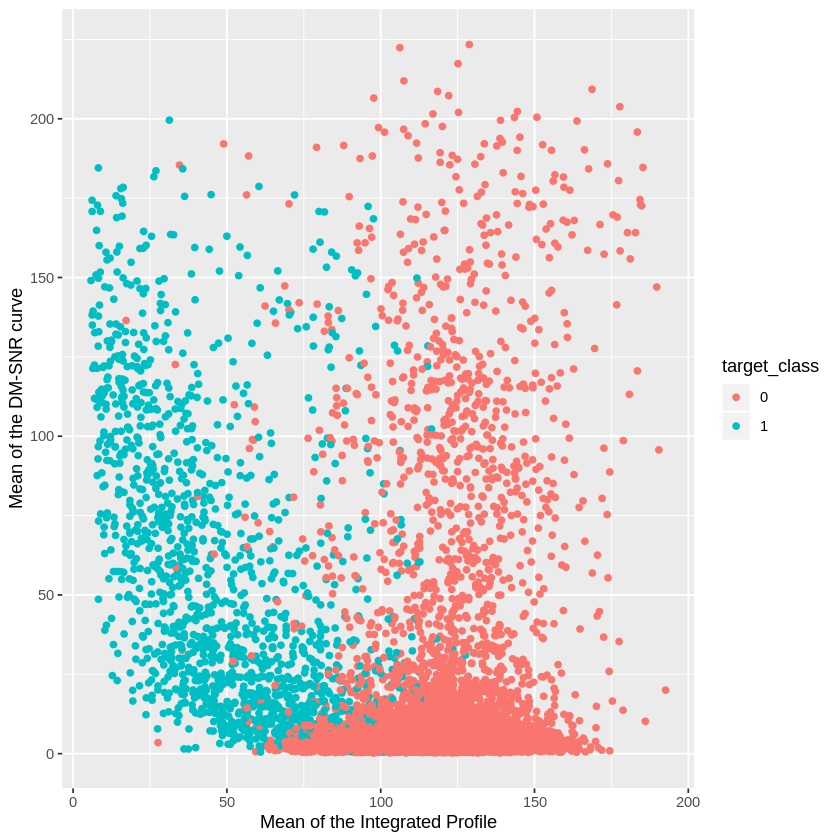

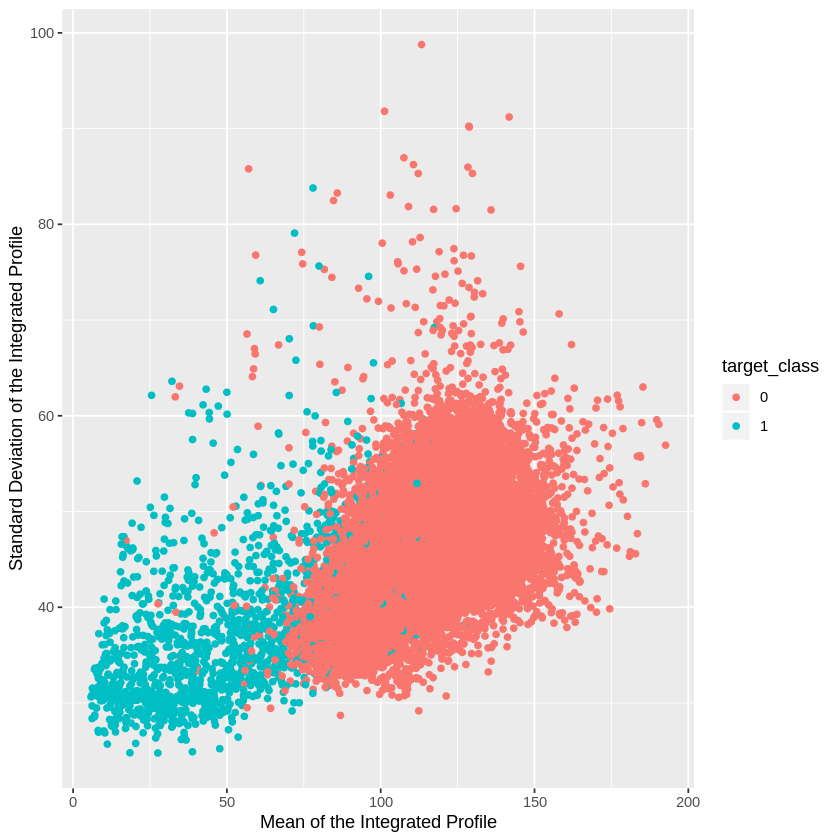

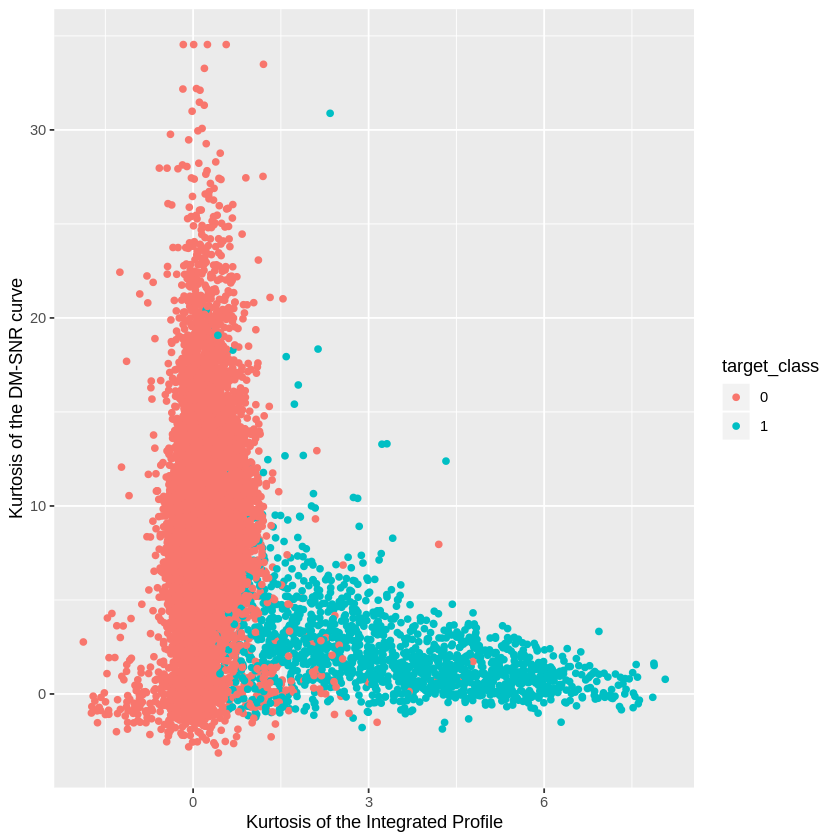

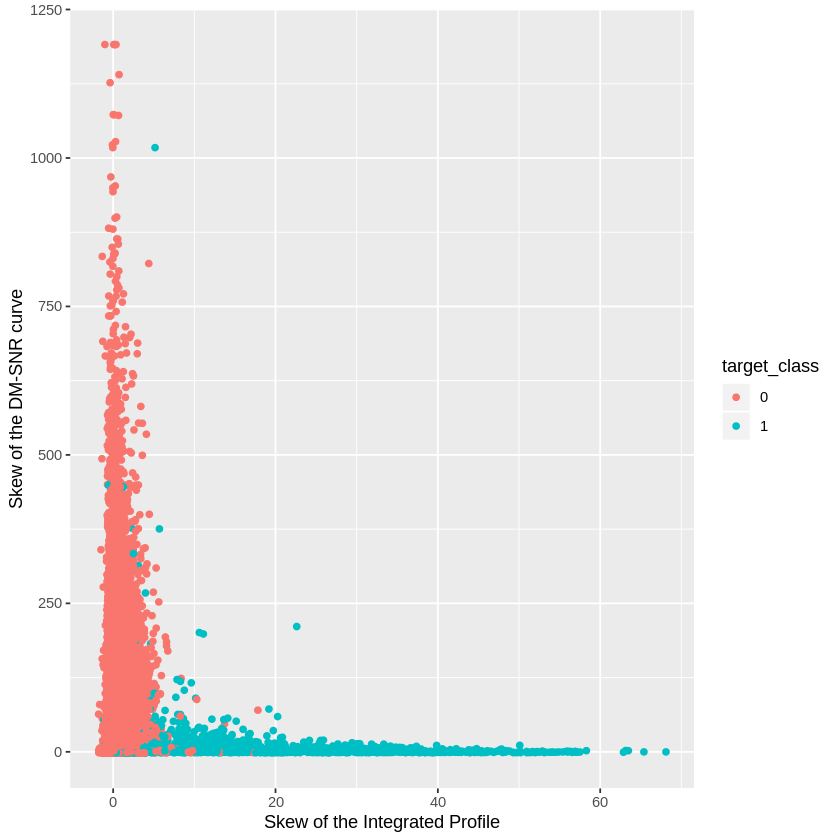

In [33]:
pulsar_plot <- pulsar %>%
    ggplot(aes(x = mean_integrated, y = mean_DMSNR)) +
    geom_point(aes(colour = target_class)) +
    xlab("Mean of the Integrated Profile") +
    ylab("Mean of the DM-SNR curve")
pulsar_plot

pulsar_plot2 <- pulsar %>%
    ggplot(aes(x = mean_integrated, y = sd_integrated)) +
    geom_point(aes(colour = target_class)) +
    xlab("Mean of the Integrated Profile") +
    ylab("Standard Deviation of the Integrated Profile")
pulsar_plot2

pulsar_plot3 <- pulsar %>%
    ggplot(aes(x = kurtosis_integrated, y = kurtosis_DMSNR)) +
    geom_point(aes(colour = target_class)) +
    xlab("Kurtosis of the Integrated Profile") +
    ylab("Kurtosis of the DM-SNR curve")
pulsar_plot3

pulsar_plot4 <- pulsar %>%
    ggplot(aes(x = skew_integrated, y = skew_DMSNR)) +
    geom_point(aes(colour = target_class)) +
    xlab("Skew of the Integrated Profile") +
    ylab("Skew of the DM-SNR curve")
pulsar_plot4